## Week 4, Lab 2: Predicting Chronic Kidney Disease in Patients
> Author: Matt Brems

We can sketch out the data science process as follows:
1. Define the problem.
2. Obtain the data.
3. Explore the data.
4. Model the data.
5. Evaluate the model.
6. Answer the problem.

In this lab, we're going to focus on steps exploring data, building models and evaluating the models we build.

There are three links you may find important:
- [A set of chronic kidney disease (CKD) data and other biological factors](./chronic_kidney_disease_full.csv).
- [The CKD data dictionary](./chronic_kidney_disease_header.txt).
- [An article comparing the use of k-nearest neighbors and support vector machines on predicting CKD](./chronic_kidney_disease.pdf).

## Step 1: Define the problem.

Suppose you're working for Mayo Clinic, widely recognized to be the top hospital in the United States. In your work, you've overheard nurses and doctors discuss test results, then arrive at a conclusion as to whether or not someone has developed a particular disease or condition. For example, you might overhear something like:

> **Nurse**: Male 57 year-old patient presents with severe chest pain. FDP _(short for fibrin degradation product)_ was elevated at 13. We did an echo _(echocardiogram)_ and it was inconclusive.

> **Doctor**: What was his interarm BP? _(blood pressure)_

> **Nurse**: Systolic was 140 on the right; 110 on the left.

> **Doctor**: It's an aortic dissection! Get to the OR _(operating room)_ now!

> _(intense music playing)_

In this fictitious  scenario, you might imagine the doctor going through a series of steps like a [flowchart](https://en.wikipedia.org/wiki/Flowchart), or a series of if-this-then-that steps to diagnose a patient. The first steps made the doctor ask what the interarm blood pressure was. Because interarm blood pressure took on the values it took on, the doctor diagnosed the patient with an aortic dissection.

Your goal, as a research biostatistical data scientist at the nation's top hospital, is to develop a medical test that can improve upon our current diagnosis system for [chronic kidney disease (CKD)](https://www.mayoclinic.org/diseases-conditions/chronic-kidney-disease/symptoms-causes/syc-20354521).

**Real-world problem**: Develop a medical diagnosis test that is better than our current diagnosis system for CKD.

**Data science problem**: Develop a medical diagnosis test that reduces both the number of false positives and the number of false negatives.

---

## Step 2: Obtain the data.

### 1. Read in the data.

In [82]:
# imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Import train_test_split and cross validation 
from sklearn.model_selection import train_test_split

from sklearn.preprocessing import StandardScaler

# Import Logistic Regression model
from sklearn.linear_model import LogisticRegression


# Import metrics
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, \
accuracy_score, recall_score, precision_score, classification_report

In [2]:
#Import dataset
df= pd.read_csv('./chronic_kidney_disease_full.csv')
#Preview dataset
df.head()

,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,...,pcv,wbcc,rbcc,htn,dm,cad,appet,pe,ane,class
0,48.0,80.0,1.020,1.0,0.0,NaN,normal,notpresent,notpresent,121.0,...,44.0,7800.0,5.2,yes,yes,no,good,no,no,ckd
1,7.0,50.0,1.020,4.0,0.0,NaN,normal,notpresent,notpresent,NaN,...,38.0,6000.0,NaN,no,no,no,good,no,no,ckd
2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,423.0,...,31.0,7500.0,NaN,no,yes,no,poor,no,yes,ckd
3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,117.0,...,32.0,6700.0,3.9,yes,no,no,poor,yes,yes,ckd
4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,106.0,...,35.0,7300.0,4.6,no,no,no,good,no,no,ckd


In [3]:
#View number of row and columns of dataset
df.shape

(400, 25)

In [4]:
#View summary of dataset 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 25 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   age     391 non-null    float64
 1   bp      388 non-null    float64
 2   sg      353 non-null    float64
 3   al      354 non-null    float64
 4   su      351 non-null    float64
 5   rbc     248 non-null    object 
 6   pc      335 non-null    object 
 7   pcc     396 non-null    object 
 8   ba      396 non-null    object 
 9   bgr     356 non-null    float64
 10  bu      381 non-null    float64
 11  sc      383 non-null    float64
 12  sod     313 non-null    float64
 13  pot     312 non-null    float64
 14  hemo    348 non-null    float64
 15  pcv     329 non-null    float64
 16  wbcc    294 non-null    float64
 17  rbcc    269 non-null    float64
 18  htn     398 non-null    object 
 19  dm      398 non-null    object 
 20  cad     398 non-null    object 
 21  appet   399 non-null    object 
 22  pe

In [5]:
#We can see that the dataset contains 10 character variables and 14 numerical variables.
#class  is the target variable.
#There are no missing values in the dataset. I will explore this later

In [6]:
#View statistical properties of dataset
df.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
age,391.0,NaN,NaN,NaN,51.483376,17.169714,2.0,42.0,55.0,64.5,90.0
bp,388.0,NaN,NaN,NaN,76.469072,13.683637,50.0,70.0,80.0,80.0,180.0
sg,353.0,NaN,NaN,NaN,1.017408,0.005717,1.005,1.01,1.02,1.02,1.025
al,354.0,NaN,NaN,NaN,1.016949,1.352679,0.0,0.0,0.0,2.0,5.0
su,351.0,NaN,NaN,NaN,0.450142,1.099191,0.0,0.0,0.0,0.0,5.0
rbc,248,2,normal,201,NaN,NaN,NaN,NaN,NaN,NaN,NaN
pc,335,2,normal,259,NaN,NaN,NaN,NaN,NaN,NaN,NaN
pcc,396,2,notpresent,354,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ba,396,2,notpresent,374,NaN,NaN,NaN,NaN,NaN,NaN,NaN
bgr,356.0,NaN,NaN,NaN,148.036517,79.281714,22.0,99.0,121.0,163.0,490.0


### 2. Check out the data dictionary. What are a few features or relationships you might be interested in checking out?

Answer: the relationship between CKD and these variables:  age, blood pressure (bp), anemia (ane), albumin (al), serum creatinine (sc) 

---

## Step 3: Explore the data.

### 3. How much of the data is missing from each column?

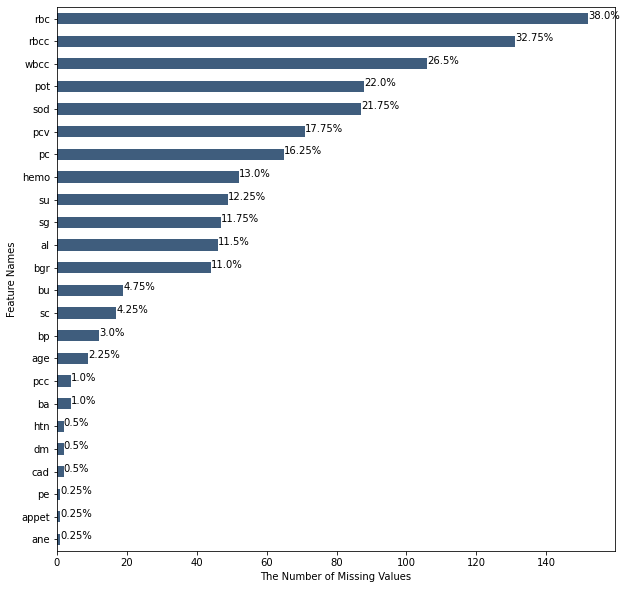

In [7]:
#Checking percentage of missing values

Nan = df.isnull().sum()[df.isnull().sum()>0]

Nan.sort_values().plot(kind='barh', figsize=(10, 10), color = "#3F5D7D");

for y, x in enumerate(Nan.sort_values()):
    
    plt.annotate(str(round(x/df.shape[0]*100,2))+'%', xy=(x, y), size=10)
    
plt.xlabel('The Number of Missing Values')

plt.ylabel('Feature Names');

In [8]:
#There are many missing values in almost every columns of dataset
#rbc and rbc have the biggest proportion of missing values about 38% and 32.75% respectively. 

### 4. Suppose that I dropped every row that contained at least one missing value. (In the context of analysis with missing data, we call this a "complete case analysis," because we keep only the complete cases!) How many rows would remain in our dataframe? What are at least two downsides to doing this?

In [9]:
#Dropping Rows with at least 1 null value in CSV file
df2 = df.dropna(axis = 0, how ='any') 

In [10]:
#shape of data after drop all missing values, and rows of dropped data 
df2.shape, df.shape[0] - df2.shape[0]

((158, 25), 242)

Answer: The number of rows of data drops from 400 to 158 (we are losing 242 or 60% of data). 
The downsides of dropping all missing values are that we are losing too many valuable information and data missingness could be another features that could predict target variables.  

### 5. Thinking critically about how our data were gathered, it's likely that these records were gathered by doctors and nurses. Brainstorm three potential areas (in addition to the missing data we've already discussed) where this data might be inaccurate or imprecise.

Answer: According to the aritcle, the dataset is collected from several medical labs, centres and
hospitals. Thus, there could potentially be bias or different standards among those labs and hospital. 

---

## Step 4: Model the data.

### 6. Suppose that I want to construct a model where no person who has chronic kidney disease (CKD) will ever be told that they do not have CKD. What (very simple, no machine learning needed) model can I create that will never tell a person with CKD that they do not have CKD?

> Hint: Don't think about `statsmodels` or `scikit-learn` here.

Answer: We have build a model that minimize or eliminate false negative. The trade off is the model will increase false positive and decrease accuracy 

### 7. In problem 6, what common classification metric did we optimize for? Did we minimize false positives or negatives?

Answer: We will maximize sensitivity and minimize false negative

### 8. Thinking ethically, what is at least one disadvantage to the model you described in problem 6?

Answer: it will cause anxiety to patients who do not have CDK and patient have to pay the cost of treament which they dont need, or intake drugs they dont need. 

### 9. Suppose that I want to construct a model where a person who does not have CKD will ever be told that they do have CKD. What (very simple, no machine learning needed) model can I create that will accomplish this?

Answer:  We will minimize or eliminate false positive

### 10. In problem 9, what common classification metric did we optimize for? Did we minimize false positives or negatives?

Answer: We will maximize Specificity and minimize false positives.

### 11. Thinking ethically, what is at least one disadvantage to the model you described in problem 9?

Answer: The patients who might have CDK but have been told that they do not, will not get the needed treatments or drugs.

### 12. Construct a logistic regression model in `sklearn` predicting class from the other variables. You may scale, select/drop, and engineer features as you wish - build a good model! Make sure, however, that you include at least one categorical/dummy feature and at least one quantitative feature.

> Hint: Remember to do a train/test split!

#### Exploring categorial variables

In [11]:
#Find categorical variables
categorical = [var for var in df.columns if df[var].dtype=='O']

print('There are {} categorical variables\n'.format(len(categorical)))

print('The categorical variables are :\n\n', categorical)

There are 11 categorical variables

The categorical variables are :

 ['rbc', 'pc', 'pcc', 'ba', 'htn', 'dm', 'cad', 'appet', 'pe', 'ane', 'class']


In [12]:
#Preview categorical variables
df[categorical].head()

,rbc,pc,pcc,ba,htn,dm,cad,appet,pe,ane,class
0,NaN,normal,notpresent,notpresent,yes,yes,no,good,no,no,ckd
1,NaN,normal,notpresent,notpresent,no,no,no,good,no,no,ckd
2,normal,normal,notpresent,notpresent,no,yes,no,poor,no,yes,ckd
3,normal,abnormal,present,notpresent,yes,no,no,poor,yes,yes,ckd
4,normal,normal,notpresent,notpresent,no,no,no,good,no,no,ckd


In [13]:
#Percentage of frequency distribution of values
for var in categorical:
    
     print(df[var].value_counts()/len(df))

normal      0.5025
abnormal    0.1175
Name: rbc, dtype: float64
normal      0.6475
abnormal    0.1900
Name: pc, dtype: float64
notpresent    0.885
present       0.105
Name: pcc, dtype: float64
notpresent    0.935
present       0.055
Name: ba, dtype: float64
no     0.6275
yes    0.3675
Name: htn, dtype: float64
no     0.6525
yes    0.3425
Name: dm, dtype: float64
no     0.910
yes    0.085
Name: cad, dtype: float64
good    0.7925
poor    0.2050
Name: appet, dtype: float64
no     0.8075
yes    0.1900
Name: pe, dtype: float64
no     0.8475
yes    0.1500
Name: ane, dtype: float64
ckd       0.625
notckd    0.375
Name: class, dtype: float64


In [14]:
# all of categorical variables are binary with some missing values

In [15]:
#turn binary variable into 1 and 0 coding 
df['rbc'] = df['rbc'].map({'abnormal' : 1, 'normal' : 0})
df['pc'] = df['pc'].map({'abnormal' : 1, 'normal' : 0})
df['pcc'] = df['pcc'].map({'present' : 1, 'notpresent' : 0})
df['ba'] = df['ba'].map({'present' : 1, 'notpresent' : 0})
df['htn'] = df['htn'].map({'yes' : 1, 'no' : 0})
df['dm'] = df['dm'].map({'yes' : 1, 'no' : 0})
df['cad'] = df['cad'].map({'yes' : 1, 'no' : 0})
df['appet'] = df['appet'].map({'poor' : 1, 'good' : 0})
df['pe'] = df['pe'].map({'yes' : 1, 'no' : 0})
df['ane'] = df['ane'].map({'yes' : 1, 'no' : 0})
df['class'] = df['class'].map({'ckd' : 1, 'notckd' : 0})

In [16]:
# print categorical variables with missing data
for col in categorical:
    if df[col].isnull().mean()>0:
        print(col, (df[col].isnull().mean()))

rbc 0.38
pc 0.1625
pcc 0.01
ba 0.01
htn 0.005
dm 0.005
cad 0.005
appet 0.0025
pe 0.0025
ane 0.0025


In [17]:
# drop rbc because this columns has too many missing values
df.drop(columns = 'rbc', inplace =True)

In [18]:
# impute missing categorical variables with mode
df['pc'].fillna(df['pc'].mode()[0], inplace=True)
df['pcc'].fillna(df['pcc'].mode()[0], inplace=True)
df['ba'].fillna(df['ba'].mode()[0], inplace=True)
df['htn'].fillna(df['htn'].mode()[0], inplace=True)
df['dm'].fillna(df['dm'].mode()[0], inplace=True)
df['cad'].fillna(df['cad'].mode()[0], inplace=True)
df['appet'].fillna(df['appet'].mode()[0], inplace=True)
df['pe'].fillna(df['pe'].mode()[0], inplace=True)
df['ane'].fillna(df['ane'].mode()[0], inplace=True)

#### Exploring numerical variables

In [19]:
 #Find numerical variables
numerical = [var for var in df.columns if df[var].dtype!='O']

print('There are {} numerical variables\n'.format(len(numerical)))

print('The numerical variables are :\n\n', numerical)

There are 24 numerical variables

The numerical variables are :

 ['age', 'bp', 'sg', 'al', 'su', 'pc', 'pcc', 'ba', 'bgr', 'bu', 'sc', 'sod', 'pot', 'hemo', 'pcv', 'wbcc', 'rbcc', 'htn', 'dm', 'cad', 'appet', 'pe', 'ane', 'class']


In [20]:
#Preview the numerical variables
df[numerical].head()

,age,bp,sg,al,su,pc,pcc,ba,bgr,bu,...,pcv,wbcc,rbcc,htn,dm,cad,appet,pe,ane,class
0,48.0,80.0,1.020,1.0,0.0,0.0,0.0,0.0,121.0,36.0,...,44.0,7800.0,5.2,1.0,1.0,0.0,0.0,0.0,0.0,1
1,7.0,50.0,1.020,4.0,0.0,0.0,0.0,0.0,NaN,18.0,...,38.0,6000.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,1
2,62.0,80.0,1.010,2.0,3.0,0.0,0.0,0.0,423.0,53.0,...,31.0,7500.0,NaN,0.0,1.0,0.0,1.0,0.0,1.0,1
3,48.0,70.0,1.005,4.0,0.0,1.0,1.0,0.0,117.0,56.0,...,32.0,6700.0,3.9,1.0,0.0,0.0,1.0,1.0,1.0,1
4,51.0,80.0,1.010,2.0,0.0,0.0,0.0,0.0,106.0,26.0,...,35.0,7300.0,4.6,0.0,0.0,0.0,0.0,0.0,0.0,1


In [21]:
#Check missing values in numerical variables
df[numerical].isnull().sum()

age        9
bp        12
sg        47
al        46
su        49
pc         0
pcc        0
ba         0
bgr       44
bu        19
sc        17
sod       87
pot       88
hemo      52
pcv       71
wbcc     106
rbcc     131
htn        0
dm         0
cad        0
appet      0
pe         0
ane        0
class      0
dtype: int64

In [22]:
# all numerical variables have missing values

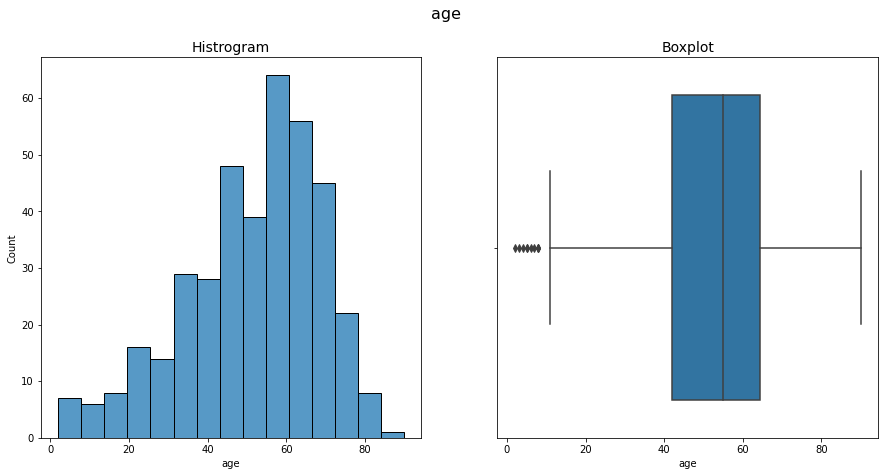

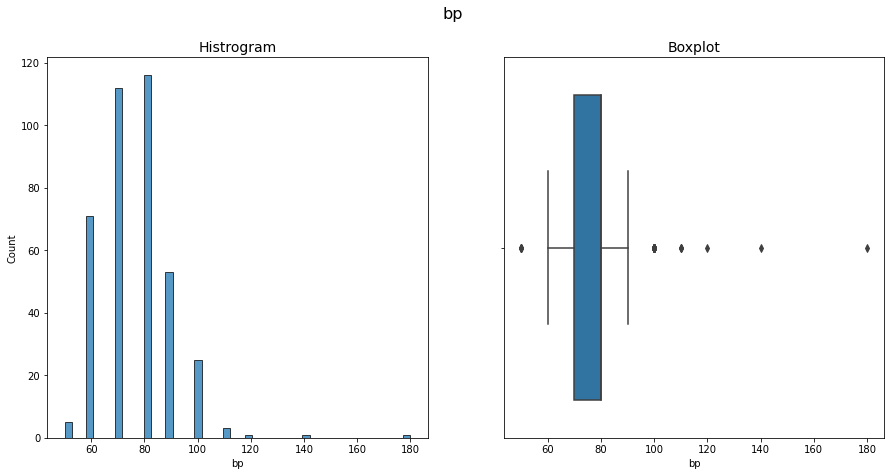

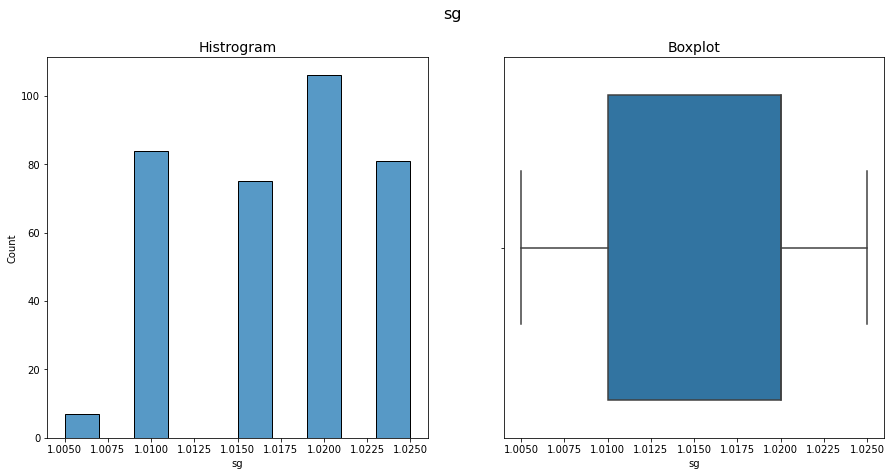

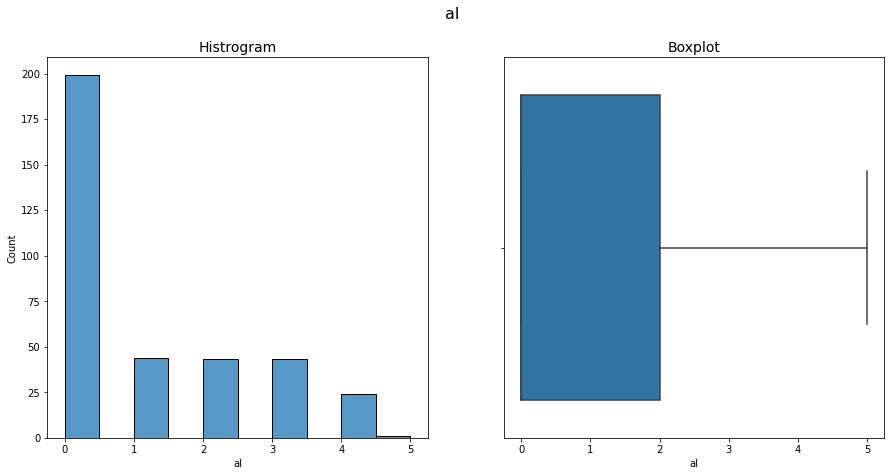

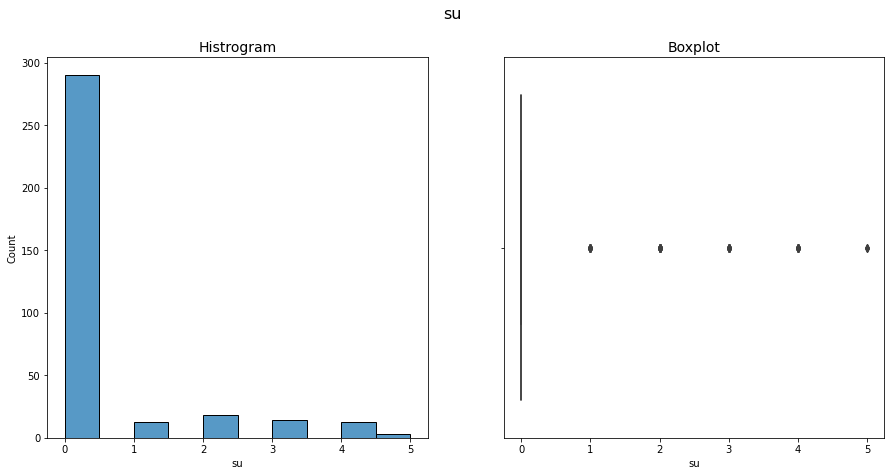

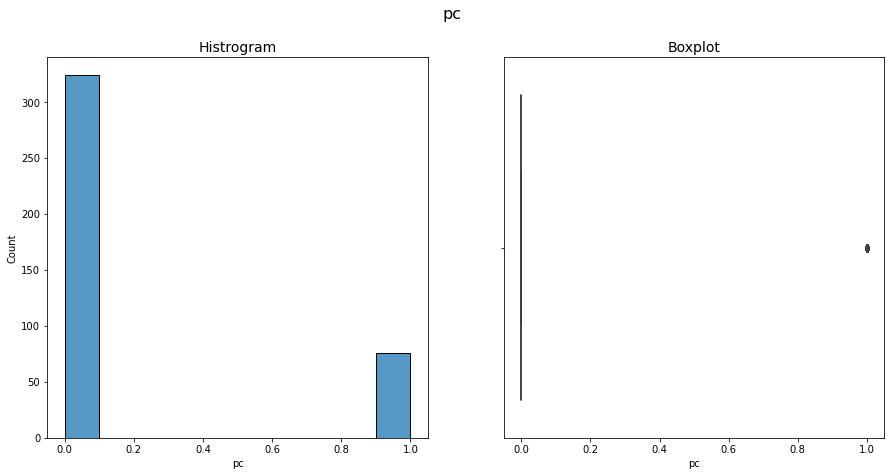

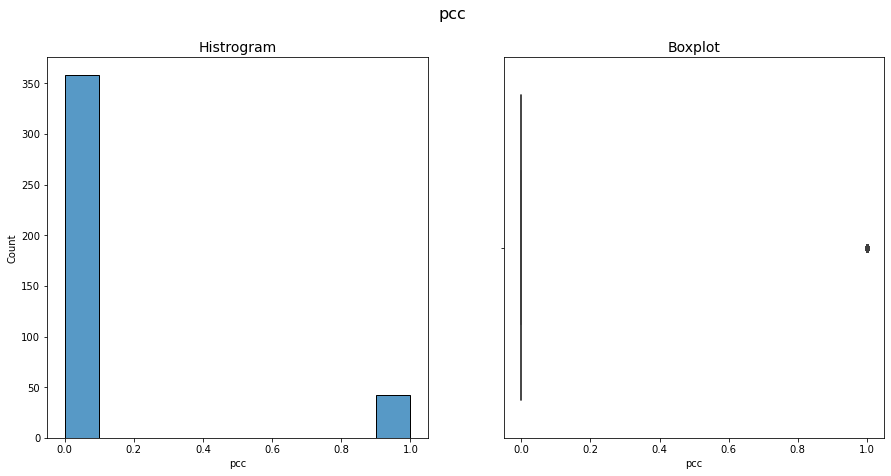

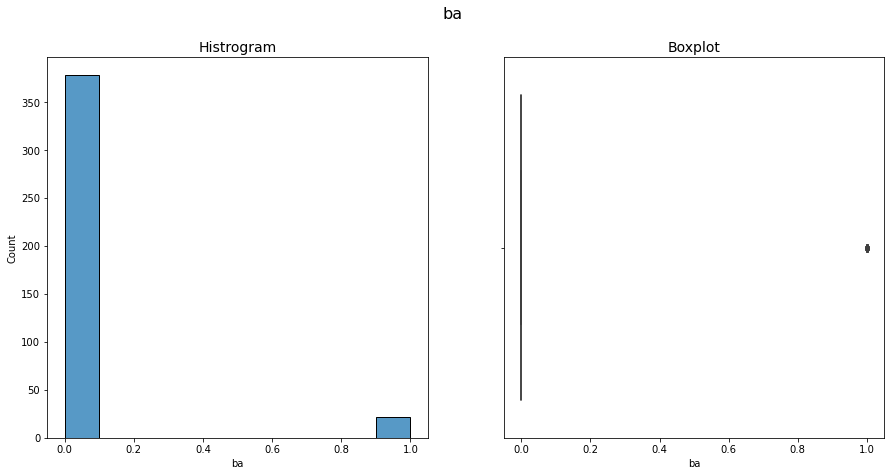

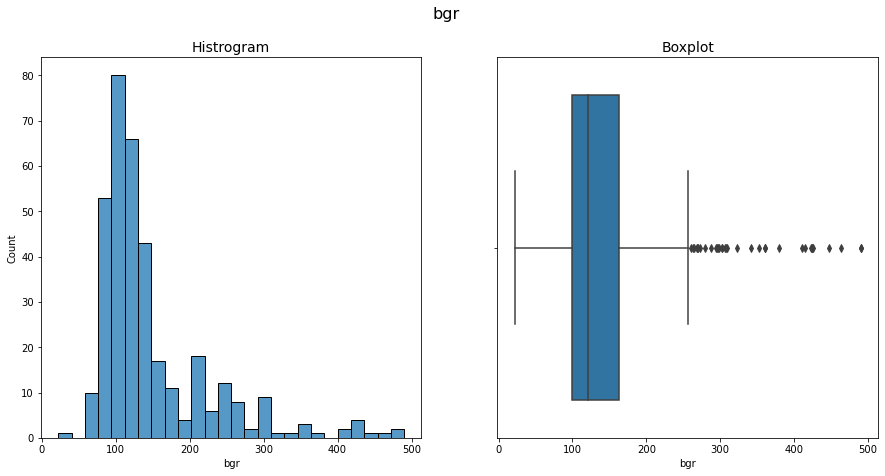

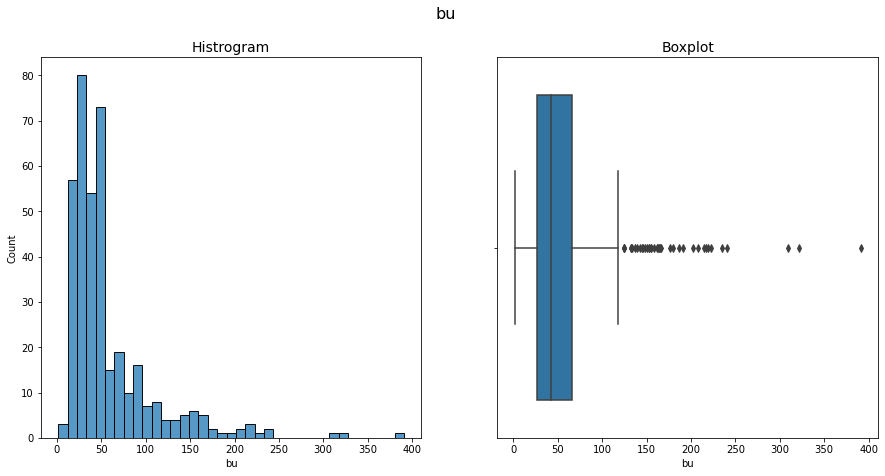

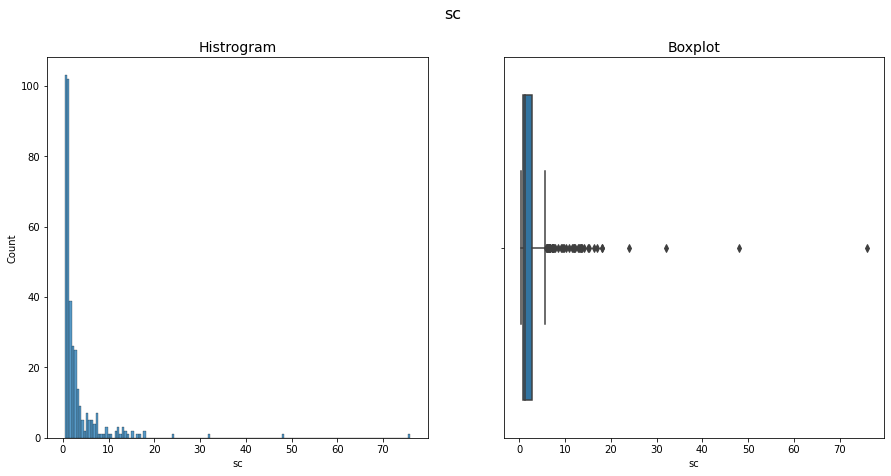

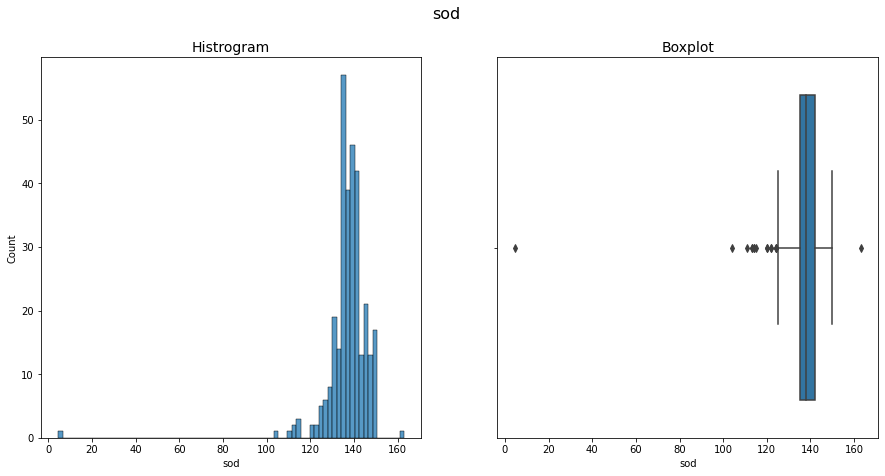

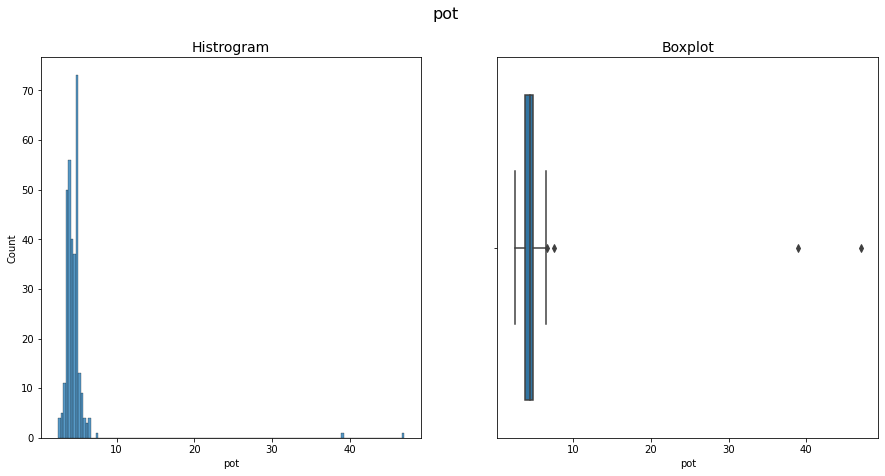

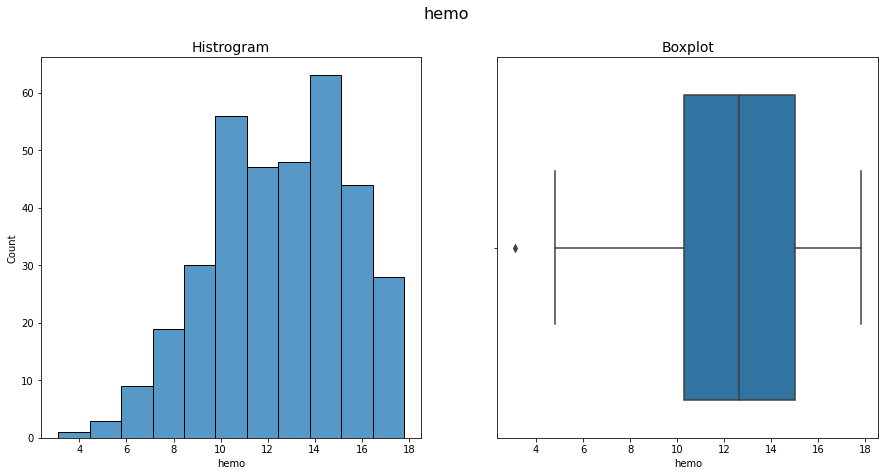

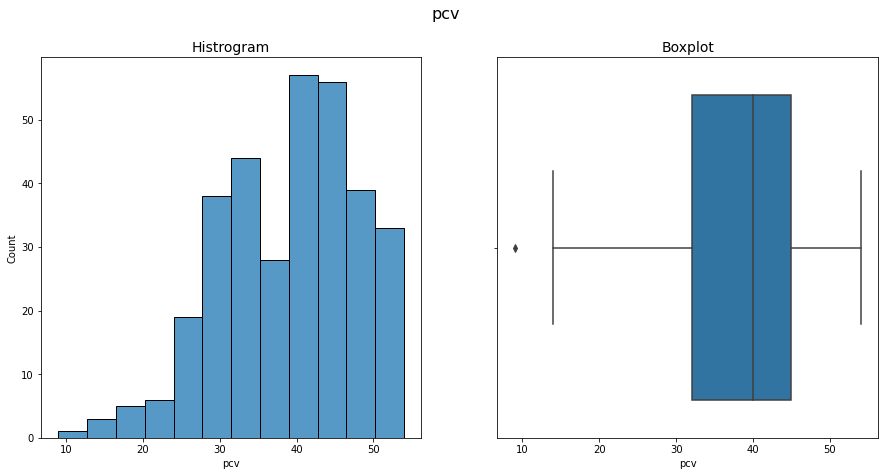

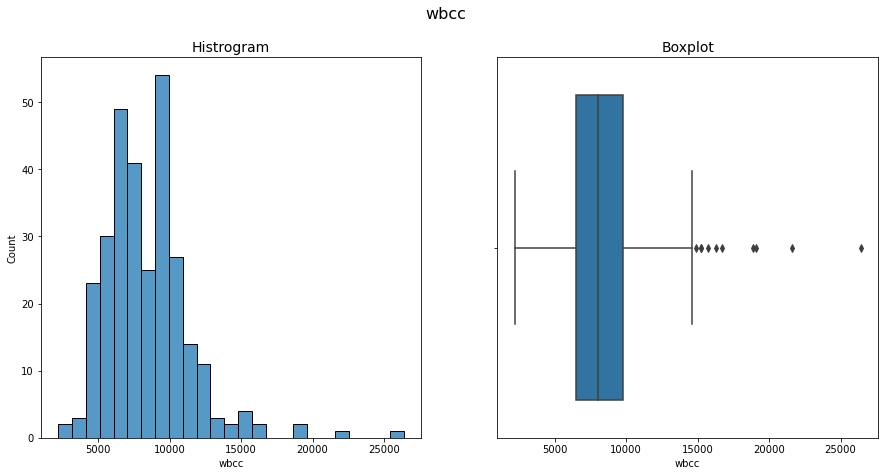

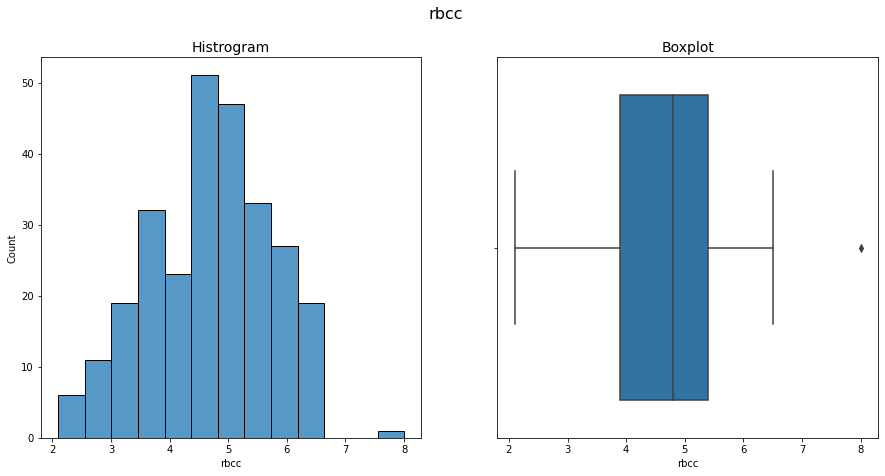

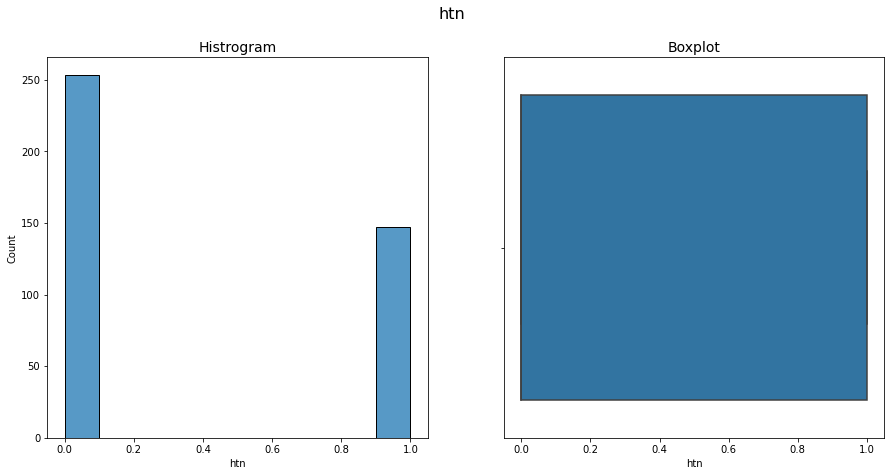

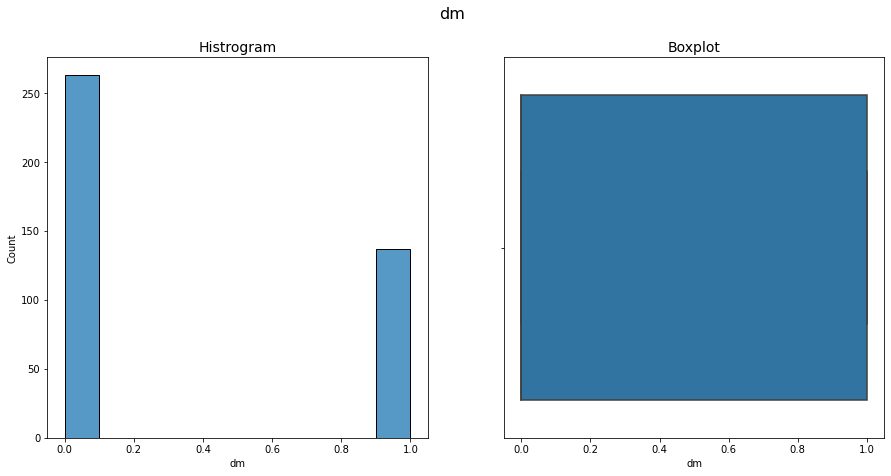

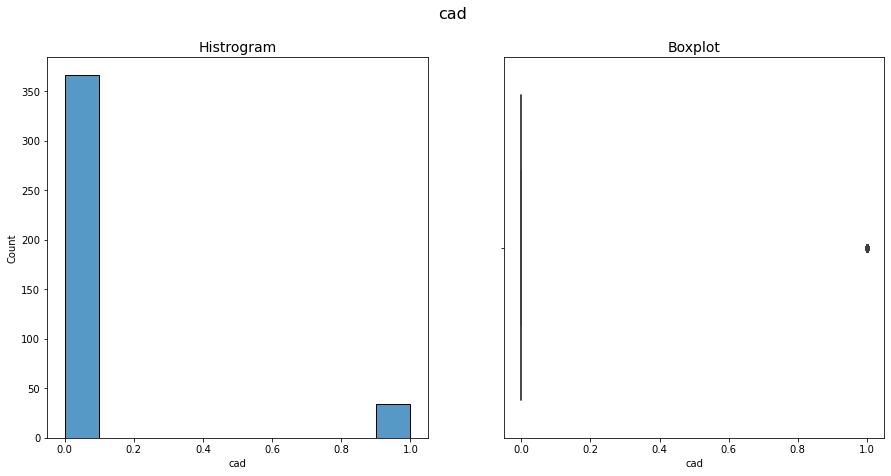

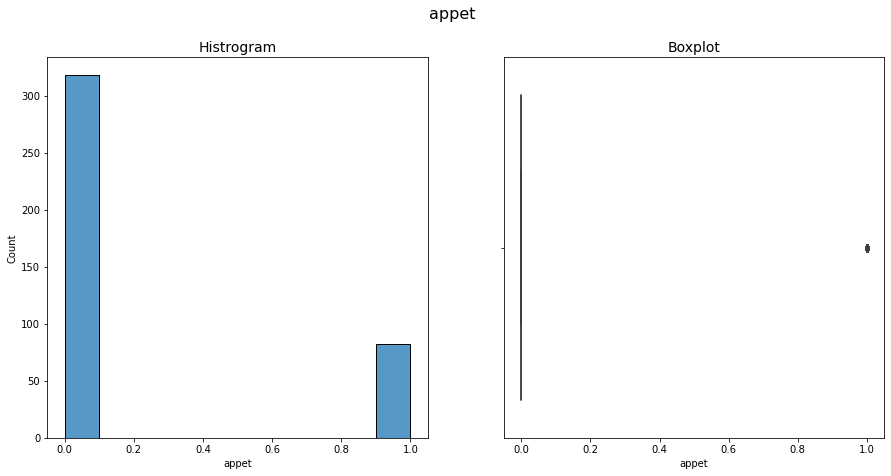

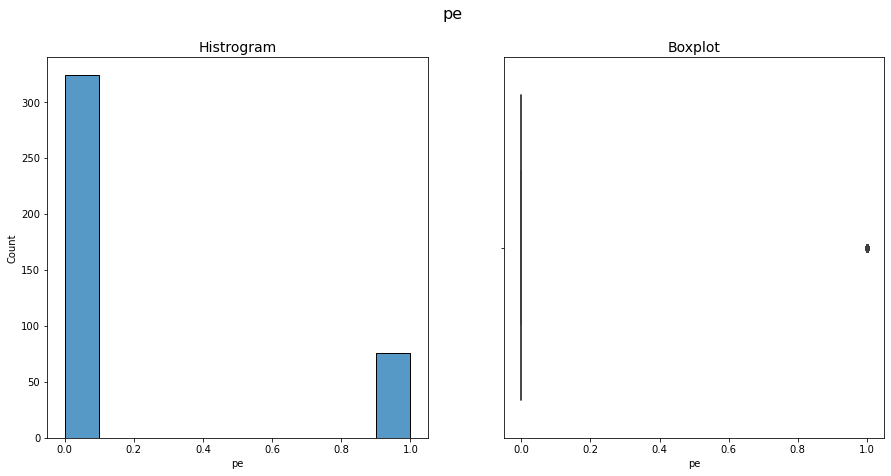

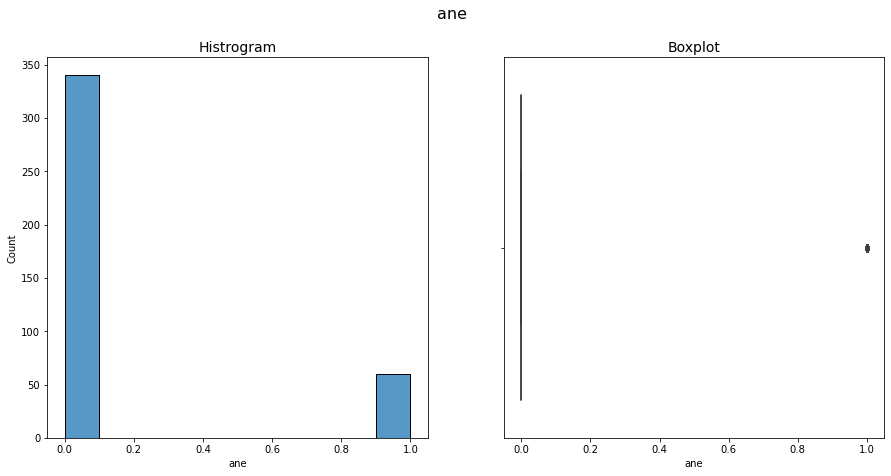

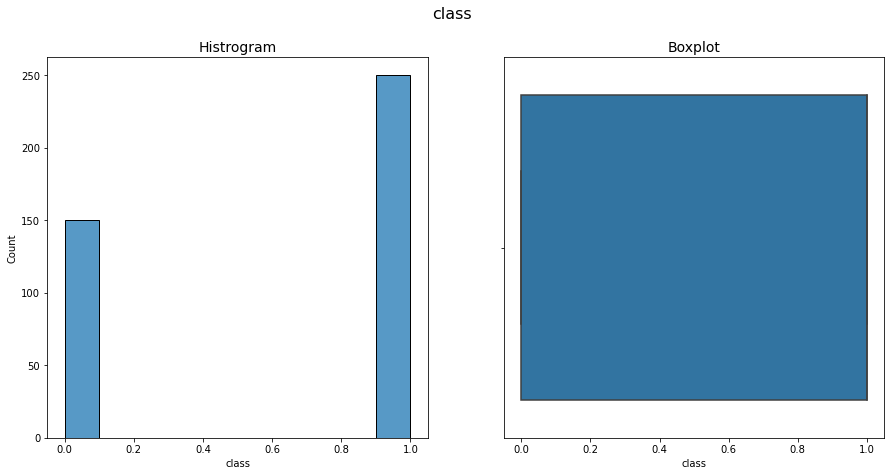

In [23]:
for col in numerical:
    fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(15,7))
    ax = ax.ravel() 
    fig.suptitle(f"{col}\n", fontsize=16)
    ax[0].set_title(f'Histrogram', fontsize =14)
    sns.histplot(df[col], ax=ax[0])
    ax[1].set_title(f'Boxplot', fontsize =14)
    sns.boxplot(x=df[col], ax=ax[1])
    plt.show()

In [24]:
# impute missing numerical variables which has normal distribution with mean
df['age'].fillna(df['age'].mean(), inplace=True)
df['hemo'].fillna(df['hemo'].mean(), inplace=True)
df['pcv'].fillna(df['pcv'].mean(), inplace=True)
df['rbcc'].fillna(df['rbcc'].mean(), inplace=True)


In [25]:
# impute missing numerical variables which left and right skewed distribution with median
df['bp'].fillna(df['bp'].median(), inplace=True)
df['sg'].fillna(df['sg'].median(), inplace=True)
df['al'].fillna(df['al'].median(), inplace=True)
df['su'].fillna(df['su'].median(), inplace=True)
df['bu'].fillna(df['bu'].median(), inplace=True)
df['sc'].fillna(df['sc'].median(), inplace=True)
df['sod'].fillna(df['sod'].median(), inplace=True)
df['pot'].fillna(df['pot'].median(), inplace=True)
df['wbcc'].fillna(df['wbcc'].median(), inplace=True)
df['bgr'].fillna(df['bgr'].median(), inplace=True)

In [26]:
#checking for missing values again
df.isnull().sum().sum()

0

#### Building Logistic regression model

In [27]:
# Set up X and y
X =df[['age', 'bp', 'ane', 'al', 'sc']]
y =df['class']
type(X), type(y)


(pandas.core.frame.DataFrame, pandas.core.series.Series)

In [28]:
#checking shape of X and y
X.shape, y.shape

((400, 5), (400,))

In [29]:
#BASELINE score?
y.value_counts(normalize = True)

1    0.625
0    0.375
Name: class, dtype: float64

In [30]:
#Train/Test Split
X_train, X_test, y_train, y_test = train_test_split\
(X, y, test_size = 0.25, random_state=42, stratify = y)

In [31]:
#checking shape of X and y
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((300, 5), (100, 5), (300,), (100,))

In [32]:
# Instantiate the Scaler object
#sc = StandardScaler()

In [33]:
#fit and transform 
#X_train_sc = sc.fit_transform(X_train) 
#X_test_sc = sc.transform(X_test)

In [34]:
# Instantiate model
logreg = LogisticRegression()
logreg

LogisticRegression()

In [35]:
# Fit model
logreg.fit(X_train, y_train)

LogisticRegression()

---

## Step 5: Evaluate the model.

### 13. Based on your logistic regression model constructed in problem 12, interpret the coefficient of one of your quantitative features.

In [36]:
y_preds = logreg.predict(X_test)

In [37]:
y_preds.shape

(100,)

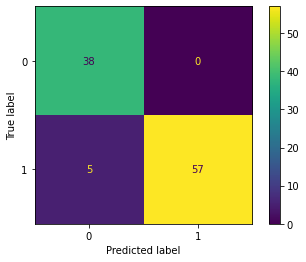

In [38]:
# Generate confusion matrix.
cm = confusion_matrix(y_test, y_preds)
ConfusionMatrixDisplay(confusion_matrix = cm, display_labels=logreg.classes_).plot();

In [83]:
def metrics(y_test, y_predict):
    print(f"Accuracy score: {accuracy_score(y_test, y_predict)} \n")
    print('----------------------------------------------------------------')
    print(pd.DataFrame(confusion_matrix(y_test, y_predict), 
                            index=['Actually_NoCDK', 'Actually_CDK'], 
                            columns=['Predicted_NoCDK', 'Predicted_CDK']), '\n')
    print('-----------------------------------------------------------------')
    print(classification_report(y_test, y_predict))
    print('-----------------------------------------------------------------')

In [84]:
metrics(y_test, y_preds)

Accuracy score: 0.95 

----------------------------------------------------------------
                Predicted_NoCDK  Predicted_CDK
Actually_NoCDK               38              0
Actually_CDK                  5             57 

-----------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.88      1.00      0.94        38
           1       1.00      0.92      0.96        62

    accuracy                           0.95       100
   macro avg       0.94      0.96      0.95       100
weighted avg       0.96      0.95      0.95       100

-----------------------------------------------------------------


In [40]:
#sensitivity When the value was 1 or CKD, how often were we correct?
#precision
# Among those my model predicted to have CDK, 
# how many did my model get correct?

0.9193548387096774

In [85]:
#precision
# Among those my model predicted to have CDK, 
# how many did my model get correct?

In [43]:
pd.DataFrame(zip(X_train.columns, np.transpose(logreg.coef_).round(3)), columns=['features', 'coef']) 

,features,coef
0,age,[0.007]
1,bp,[0.054]
2,ane,[1.284]
3,al,[2.131]
4,sc,[2.841]


#### interpret the coefficient of one of quantitative features.

In [44]:
#An increase of 1 year in age multiplies the odds of Chronic Kidney Disease(CKD) by 0.007
#An increase of 1 mm/Hg in Blood Pressure multiplies the odds of Chronic Kidney Disease(CKD) by 0.054
#An increase of 1 level in Albumin multiplies the odds of Chronic Kidney Disease(CKD) by 2.13
#An increase of 1 mgs/dl in Serum Creatinine multiplies the odds of Chronic Kidney Disease(CKD) by 2.84

### 14. Based on your logistic regression model constructed in problem 12, interpret the coefficient of one of your categorical/dummy features.

In [45]:
# The Anemia group has a 1.28 times the odds of the non-anemai group of having Chronic Kidney Disease(CKD).
# The Anemia group has 24% (1.28 – 1 = 0.28) more odds of having Chronic Kidney Disease(CKD) than the non-anemia group.

### 15. Despite being a relatively simple model, logistic regression is very widely used in the real world. Why do you think that's the case? Name at least two advantages to using logistic regression as a modeling technique.

Answer: The interpretation is relatively simple for general people to understand
The model is similar to linear regression which is familiar with wider audience

### 16. Does it make sense to generate a confusion matrix on our training data or our test data? Why? Generate it on the proper data.

> Hint: Once you've generated your predicted $y$ values and you have your observed $y$ values, then it will be easy to [generate a confusion matrix using sklearn](http://scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html).

In [46]:
#Confusion matrix should be generated on the test data because it should show the results of the prediction

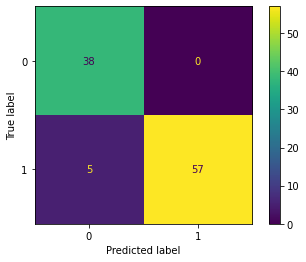

In [47]:
# Generate confusion matrix.
cm = confusion_matrix(y_test, y_preds)
ConfusionMatrixDisplay(confusion_matrix = cm, display_labels=logreg.classes_).plot();

### 17. In this hospital case, we want to predict CKD. Do we want to optimize for sensitivity, specificity, or something else? Why? (If you don't think there's one clear answer, that's okay! There rarely is. Be sure to defend your conclusion!)

Answer: We will maximize sensitivity and minimize false negative more, because we want all patients who have CKD get proper treatments. 

### 18 (BONUS). Write a function that will create an ROC curve for you, then plot the ROC curve.

Here's a strategy you might consider:
1. In order to even begin, you'll need some fit model. Use your logistic regression model from problem 12.
2. We want to look at all values of your "threshold" - that is, anything where .predict() gives you above your threshold falls in the "positive class," and anything that is below your threshold falls in the "negative class." Start the threshold at 0.
3. At this value of your threshold, calculate the sensitivity and specificity. Store these values.
4. Increment your threshold by some "step." Maybe set your step to be 0.01, or even smaller.
5. At this value of your threshold, calculate the sensitivity and specificity. Store these values.
6. Repeat steps 3 and 4 until you get to the threshold of 1.
7. Plot the values of sensitivity and 1 - specificity.

### 19. Suppose you're speaking with the biostatistics lead at Mayo Clinic, who asks you "Why are unbalanced classes generally a problem? Are they a problem in this particular CKD analysis?" How would you respond?

Unbalanced classes generally is a problem because there may not be sufficient patterns belonging to the minority class to adequately represent its distribution. The model cannot learn from minority class. However, in this dataset the minority class is about 37.5% which is adequate proportion. Thus, there is no problem with unbalanced classes in this case. 

### 20. Suppose you're speaking with a doctor at Mayo Clinic who, despite being very smart, doesn't know much about data science or statistics. How would you explain why unbalanced classes are generally a problem to this doctor?

Answer: The model we are using cannot learn pattern from too small proportion of data, thus the model cannot make prediction with high accuracy. 

### 21. Let's create very unbalanced classes just for the sake of this example! Generate very unbalanced classes by [bootstrapping](http://stattrek.com/statistics/dictionary.aspx?definition=sampling_with_replacement) (a.k.a. random sampling with replacement) the majority class.

1. The majority class are those individuals with CKD.
2. Generate a random sample of size 200,000 of individuals who have CKD **with replacement**. (Consider setting a random seed for this part!)
3. Create a new dataframe with the original data plus this random sample of data.
4. Now we should have a dataset with around 200,000 observations, of which only about 0.00075% are non-CKD individuals.

In [49]:
# dataframe of individuals who have CKD
df2 =df[df['class'] == 1]

In [75]:
#random sample of size 200,000 of individuals who have CKD with replacement
df3 = df2.sample(n = 200_000, replace = True)
df3.shape

(200000, 24)

In [67]:
df3['class'].value_counts(normalize =True)

1    1.0
Name: class, dtype: float64

In [74]:
#Create a new dataframe with the original data plus this random sample of data
df4 = pd.concat([df, df3])
df4.shape

(200400, 24)

In [73]:
#about 0.075% are non-CKD 
df4['class'].value_counts(normalize =True)*100

1    99.92515
0     0.07485
Name: class, dtype: float64

### 22. Build a logistic regression model on the unbalanced class data and evaluate its performance using whatever method(s) you see fit. How would you describe the impact of unbalanced classes on logistic regression as a classifier?
> Be sure to look at how well it performs on non-CKD data.

In [86]:
# Set up X and y
X =df4[['age', 'bp', 'ane', 'al', 'sc']]
y =df4['class']

#Train/Test Split
X_train, X_test, y_train, y_test = train_test_split\
(X, y, test_size = 0.25, random_state=42, stratify = y)

# Instantiate model
logreg2 = LogisticRegression()

# Fit model
logreg2.fit(X_train, y_train)

#making prediction
y_preds = logreg2.predict(X_test)

In [90]:
#BASELINE score
y.value_counts(normalize = True)*100

1    99.92515
0     0.07485
Name: class, dtype: float64

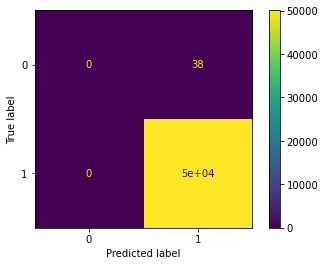

In [87]:
# Generate confusion matrix.
cm = confusion_matrix(y_test, y_preds)
ConfusionMatrixDisplay(confusion_matrix = cm, display_labels=logreg2.classes_).plot();

In [88]:
metrics(y_test, y_preds)

Accuracy score: 0.9992415169660679 

----------------------------------------------------------------
                Predicted_NoCDK  Predicted_CDK
Actually_NoCDK                0             38
Actually_CDK                  0          50062 

-----------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        38
           1       1.00      1.00      1.00     50062

    accuracy                           1.00     50100
   macro avg       0.50      0.50      0.50     50100
weighted avg       1.00      1.00      1.00     50100

-----------------------------------------------------------------


C:\Users\science01\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\science01\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\science01\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
#When we have severe imbalanced classes (99.92515/0.07485). The model has a few information to learn from minority classes. Thus, the model ended up
#making prediction only the mojority class. 

---

## Step 6: Answer the problem.

At this step, you would generally answer the problem! In this situation, you would likely present your model to doctors or administrators at the hospital and show how your model results in reduced false positives/false negatives. Next steps would be to find a way to roll this model and its conclusions out across the hospital so that the outcomes of patients with CKD (and without CKD!) can be improved!